# Business understanding
Als politiechef wil ik de impact en het herstel van de coronapandemie in kaart hebben, zodat ik kan anticiperen op mogelijke veranderingen

## Business objectives
De politiechef wilt de impact van COVID en het herstel daarvan in kaart hebben.

- Een grafiek met gegevens van type criminaliteit voor covid en na covid

# Data understanding for Crime Stat
Dit documentje is een basis voor de data understanding van de datasets die we hebben gekgregen voor de tweede challenge voor de Proof of Concept.


#### NOTE: De code hieronder zorgt dat de rest van het notebook werkt op zowel Mac als Windows

In [2]:
import platform
import os

# Get working directory
working_directory = os.getcwd()

# check if macos
isMac = "macos" in platform.platform().lower()

## Format
De data is aangeleverd in twee losse csv bestanden; crime.csv en offense_codes.csv. De bestanden zijn repectievelijk ±120 mb en ±35kb. 

NOTE: voeg de bestanden toe aan een mapje "data" onder de namen die hierboven staan.

In [3]:
# Variabele 
crime_file_path = (f"{working_directory}/data/crime.csv" if isMac else f"{working_directory}\\data\\crime.csv")
offense_file_path = f"{working_directory}/data/offense_codes.csv" if isMac else f"{working_directory}\\data\\offense_codes.csv"

## Data benaderen
De data kan worden benaderd met de paden die in bovenstaande cell staan. Dit doen we door ze in een Pandas Dataframe te stoppen, zoals hieronder. Hierna kun je in dit hele Jupyter Notebook gebruik maken van de dataframes.

In [6]:
import pandas as pd

# Data in een dataframe te stoppen
crime_df = pd.read_csv(crime_file_path)
offense_df = pd.read_csv(offense_file_path)

# Van de reported date een datetime maken.
crime_df["REPORTED_DATE"] = pd.to_datetime(crime_df["REPORTED_DATE"])
crime_df.dropna()
crime_df.index = crime_df["REPORTED_DATE"]
crime_df.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,,,,,,,,,,,,
2022-01-04 20:36:00,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,1/4/2022 11:30:00 AM,1/4/2022 12:00:00 PM,2022-01-04 20:36:00,128 S CANOSA CT,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0
2022-01-03 11:01:00,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 6:45:00 AM,NaN,2022-01-03 11:01:00,650 15TH ST,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0
2022-01-03 06:11:00,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 1:00:00 AM,NaN,2022-01-03 06:11:00,919 E COLFAX AVE,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0
2022-01-03 21:12:00,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 7:47:00 PM,NaN,2022-01-03 21:12:00,2345 W ALAMEDA AVE,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0
2022-01-03 20:31:00,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 5:06:00 PM,NaN,2022-01-03 20:31:00,7800 E SMITH RD,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26 09:22:00,202297778,202297778260700,2607,0,fraud-by-telephone,white-collar-crime,2/25/2022 8:00:00 AM,2/25/2022 5:00:00 PM,2022-02-26 09:22:00,4850 S AMMONS ST,3117145.0,1654373.0,-105.084098,39.629311,4.0,423.0,marston,1,0
2022-02-26 10:21:00,202297851,202297851260700,2607,0,fraud-by-telephone,white-collar-crime,1/27/2022 9:00:00 AM,NaN,2022-02-26 10:21:00,14151 E RANDOLPH PL,3190194.0,1716193.0,-104.823123,39.797813,5.0,521.0,montbello,1,0
2022-02-25 23:30:00,202296894,202296894260900,2609,0,fraud-by-use-of-computer,white-collar-crime,2/24/2022 12:00:00 PM,NaN,2022-02-25 23:30:00,301 N JERSEY ST,3163147.0,1688229.0,-104.920013,39.721561,3.0,321.0,hilltop,1,0


## Data exploratie
Voor een uitleg van de data verwijzen we u graag door naar het basic_data_understanding notebook.


# Data preparation

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adds a normalized reported date, the reported date gets converted to a date only, to be able to merge the mondays
crime_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(crime_df["REPORTED_DATE"]).dt.normalize()
crime_df["YEAR"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.isocalendar().year
crime_df["MONTH"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.month
crime_df["WEEK"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.isocalendar().week
crime_df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DATE_NORMALIZED,YEAR,MONTH,WEEK
REPORTED_DATE,,,,,,,,,,,,,,,,,,,,,
2022-01-04 20:36:00,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,1/4/2022 11:30:00 AM,1/4/2022 12:00:00 PM,2022-01-04 20:36:00,128 S CANOSA CT,...,39.714268,4.0,411.0,valverde,1,0,2022-01-04,2022,1,1
2022-01-03 11:01:00,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 6:45:00 AM,NaN,2022-01-03 11:01:00,650 15TH ST,...,39.743649,6.0,611.0,cbd,1,0,2022-01-03,2022,1,1
2022-01-03 06:11:00,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 1:00:00 AM,NaN,2022-01-03 06:11:00,919 E COLFAX AVE,...,39.740130,6.0,621.0,north-capitol-hill,1,0,2022-01-03,2022,1,1
2022-01-03 21:12:00,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 7:47:00 PM,NaN,2022-01-03 21:12:00,2345 W ALAMEDA AVE,...,39.711518,4.0,411.0,valverde,1,0,2022-01-03,2022,1,1
2022-01-03 20:31:00,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 5:06:00 PM,NaN,2022-01-03 20:31:00,7800 E SMITH RD,...,39.769688,5.0,512.0,central-park,1,0,2022-01-03,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26 09:22:00,202297778,202297778260700,2607,0,fraud-by-telephone,white-collar-crime,2/25/2022 8:00:00 AM,2/25/2022 5:00:00 PM,2022-02-26 09:22:00,4850 S AMMONS ST,...,39.629311,4.0,423.0,marston,1,0,2022-02-26,2022,2,8
2022-02-26 10:21:00,202297851,202297851260700,2607,0,fraud-by-telephone,white-collar-crime,1/27/2022 9:00:00 AM,NaN,2022-02-26 10:21:00,14151 E RANDOLPH PL,...,39.797813,5.0,521.0,montbello,1,0,2022-02-26,2022,2,8
2022-02-25 23:30:00,202296894,202296894260900,2609,0,fraud-by-use-of-computer,white-collar-crime,2/24/2022 12:00:00 PM,NaN,2022-02-25 23:30:00,301 N JERSEY ST,...,39.721561,3.0,321.0,hilltop,1,0,2022-02-25,2022,2,8


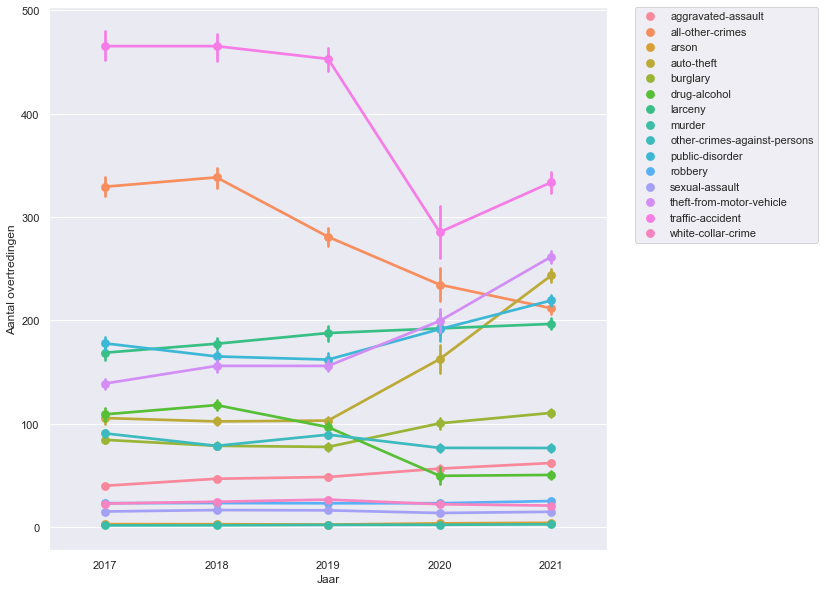

In [138]:
j1_crime_df = crime_df.copy()

grouped = j1_crime_df.groupby(["OFFENSE_CATEGORY_ID", "YEAR", "WEEK"], as_index=False).size()
grouped["YEARWEEK"] = grouped["YEAR"].astype(str) + "-" + grouped["WEEK"].astype(str)
grouped_till22 = grouped.drop(grouped[grouped["YEAR"] == 2022].index)
grouped_till22.columns = ["Overtreding", "Jaar", "Week", "Aantal overtredingen", "Jaarweek"]
grouped_till22

# grouped = j1_crime_df.resample('M').apply({'OFFENSE_CATEGORY_ID':'count'})
# grouped

plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")
sns.pointplot(data=grouped_till22, x="Jaar", y="Aantal overtredingen", hue="Overtreding", grid=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

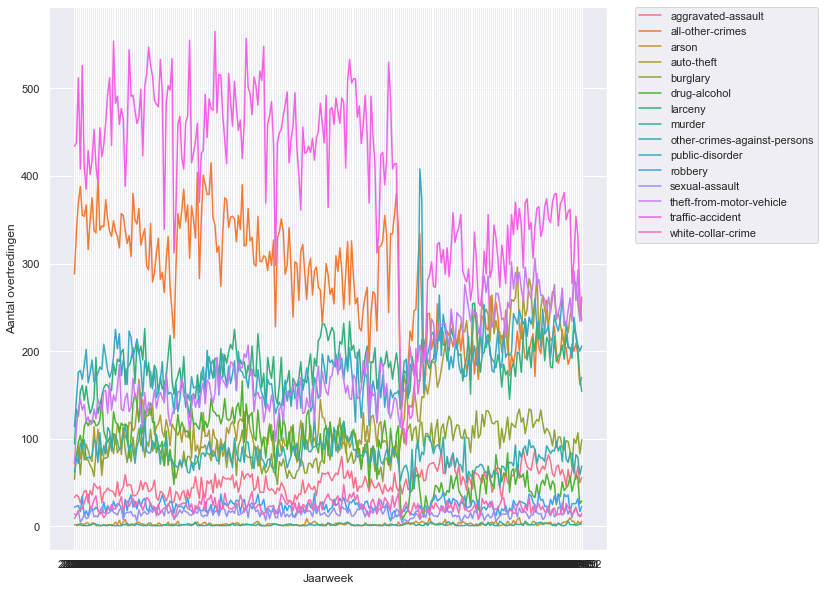

In [140]:
plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")
sns.lineplot(data=grouped_till22, x="Jaarweek", y="Aantal overtredingen", hue="Overtreding")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()